# Tomato Prices in Different States of India #

#### Importing Libraries ####

In [1]:
import pandas as pd
from lxml import objectify
import matplotlib.pyplot as plt
%matplotlib inline

#### Path of files ####


In [2]:
path = ['/home/user/Downloads/Tomato_2014.xml', 
        '/home/user/Downloads/Tomato_2015.xml', 
        '/home/user/Downloads/Tomato_2016.xml']

#### Creating an empty Dataframe ####

In [3]:
df = pd.DataFrame()

#### Function for extracting data from files and storing in list ####

In [4]:
def daata():
    all_data = []
    rt = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    for i in range(0, len(rt)):
        obj = rt[i].getchildren()
        column_value = []
        for j in range(0, length_column):
            column_value.append(obj[j].text)
        all_data.append(column_value)
    return all_data

## Part 1 ##

#### Creating Different DataFrames for different files and appending them in one ####

In [5]:
for k in range(0, len(path)):
    xml = objectify.parse(open(path[k]))
    root = xml.getroot()
    column_header = []
    column_name = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    for item in column_name:
        column_header.append(item.values()[0])
    length_column = len(column_header)
    final_data = daata()
    df = df.append(pd.DataFrame(data = final_data,columns = column_header),ignore_index = True)

In [6]:
df

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,01/01/2014,100,300,200
1,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,02/01/2014,100,300,200
2,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,03/01/2014,100,300,200
3,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,04/01/2014,100,300,200
4,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,05/01/2014,100,200,200
5,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,06/01/2014,100,200,200
6,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,07/01/2014,100,200,150
7,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,08/01/2014,100,200,150
8,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,09/01/2014,200,400,300
9,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,10/01/2014,100,200,150


## Part 2 ##
#### Creating new Dataframe for Kalikiri Market ####

In [7]:
df1 = df[(df['Market'] == 'Kalikiri') & (df['Arrival_Date'].str.contains('01/2014'))]

#### plotting the graph for Kalikiri market tomato prices ####

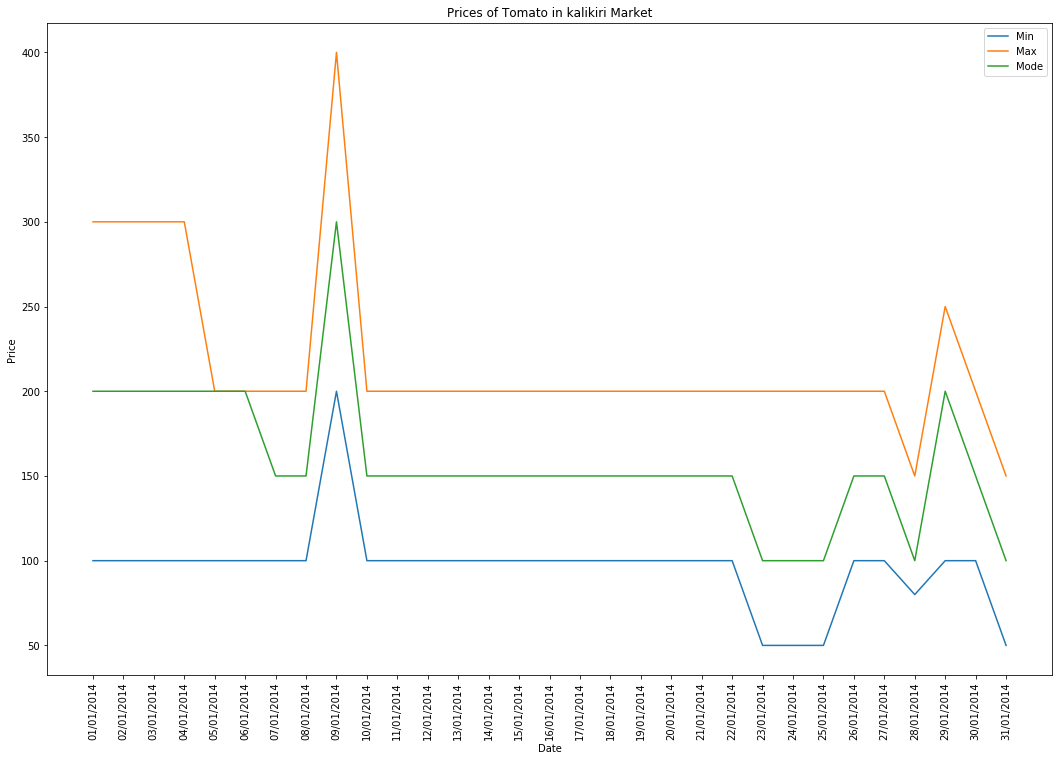

In [20]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prices of Tomato in kalikiri Market')
asd = list(df1['Arrival_Date'])
art = list(df1['Arrival_Date'].index)
plt.xticks(art,asd,rotation='vertical')
ay = df1['Min_x0020_Price']
ax = df1['Max_x0020_Price']
az = df1['Modal_x0020_Price']
fig_size=[18,12]
plt.plot(ay, label = 'Minimun Price')
plt.plot(ax, label = 'Maximum Price')
plt.plot(az, label = 'Model Price')
plt.rcParams["figure.figsize"] = fig_size
plt.legend(['Min', 'Max', 'Mode'])
plt.show()


#### Adding 'Seasons' column with Winter, Summer, Spring and Autumn based on months ####

In [12]:
df.loc[df['Arrival_Date'].str.contains('/01/') | \
       df['Arrival_Date'].str.contains('/12/') | \
       df['Arrival_Date'].str.contains('/11/'), "Seasons"] = "Winter"
df.loc[df['Arrival_Date'].str.contains('/04/') | \
       df['Arrival_Date'].str.contains('/05/') | \
       df['Arrival_Date'].str.contains('/06/') | \
       df['Arrival_Date'].str.contains('/07/') | \
       df['Arrival_Date'].str.contains('/08/'),"Seasons"] = "Summer"
df.loc[df['Arrival_Date'].str.contains('/02/') | \
       df['Arrival_Date'].str.contains('/03/'), "Seasons"] = "Spring"
df.loc[df['Arrival_Date'].str.contains('/09/') | \
       df['Arrival_Date'].str.contains('/10/'), "Seasons"] = "Autumn"
df


,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Seasons
0,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,01/01/2014,100,300,200,Winter
1,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,02/01/2014,100,300,200,Winter
2,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,03/01/2014,100,300,200,Winter
3,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,04/01/2014,100,300,200,Winter
4,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,05/01/2014,100,200,200,Winter
5,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,06/01/2014,100,200,200,Winter
6,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,07/01/2014,100,200,150,Winter
7,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,08/01/2014,100,200,150,Winter
8,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,09/01/2014,200,400,300,Winter
9,Andhra Pradesh,Chittor,Kalikiri,Tomato,Local,10/01/2014,100,200,150,Winter


## Part 3 ##
#### Finding Mean price for different Seasons and years ####

In [21]:
new_column_header = ['Year', 'Winter', 'Summer', 'Spring', 'Autumn']
ar = []
year = ['2014', '2015', '2016']

for i in range(0, len(year)):
    r = []
    r.append(year[i])
    r.append(df[(df.State == 'Andhra Pradesh') & \
                (df.Seasons == 'Winter') & \
                (df.Arrival_Date.str.contains(year[i]))].Max_x0020_Price.astype(int).mean())
    r.append(df[(df.State == 'Andhra Pradesh') & \
                (df.Seasons == 'Summer') & \
                (df.Arrival_Date.str.contains(year[i]))].Max_x0020_Price.astype(int).mean())
    r.append(df[(df.State == 'Andhra Pradesh') & \
                (df.Seasons == 'Spring') & \
                (df.Arrival_Date.str.contains(year[i]))].Max_x0020_Price.astype(int).mean())
    r.append(df[(df.State == 'Andhra Pradesh') & \
                (df.Seasons == 'Autumn') & \
                (df.Arrival_Date.str.contains(year[i]))].Max_x0020_Price.astype(int).mean())
    ar.append(r)
new_df = pd.DataFrame(data = ar, columns = new_column_header)
new_df

,Year,Winter,Summer,Spring,Autumn
0,2014,694.180498,1883.724404,404.680851,1299.995294
1,2015,2151.961644,1549.529528,721.282895,1485.946565
2,2016,1184.511979,2337.981221,703.381313,1067.063063


#### Plotting the stack bar graph for the mean prices per year #### 

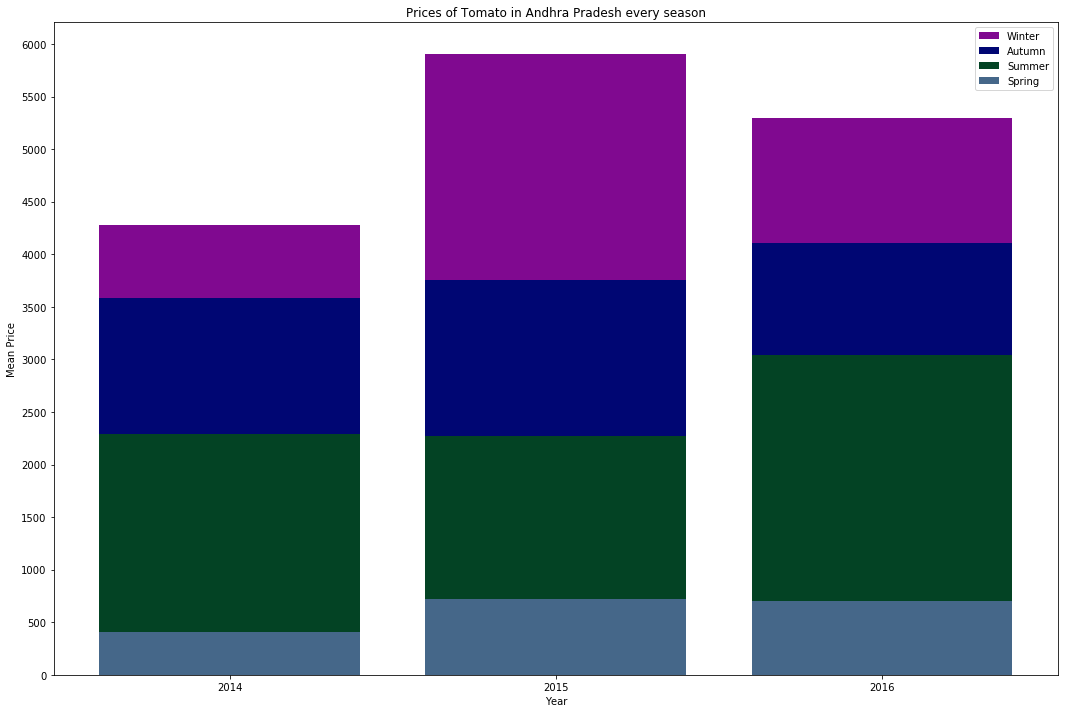

In [23]:
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.title('Prices of Tomato in Andhra Pradesh every season')
asd = list(new_df['Year'])
ind = list(new_df['Summer'].index)
a = new_df['Spring']
b = new_df['Summer']
c = new_df['Autumn']
d = new_df['Winter']
fig_size=[18,12]
p1 = plt.bar(ind, d, color='#800990', bottom=[a[j] +b[j] +c[j] for j in range(len(a))])
p2 = plt.bar(ind, c, color='#000673', bottom=[a[j] +b[j] for j in range(len(a))])
p3 = plt.bar(ind, b, color='#034324', bottom = a)
p4 = plt.bar(ind, a, color='#456789')

plt.xticks(ind, asd)
plt.yticks(np.arange(0, 6001, 500))
plt.rcParams["figure.figsize"] = fig_size
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Winter', 'Autumn', 'Summer', 'Spring'))
plt.show()